In [ ]:
from rbm_numpy import RBM_numpy
import numpy as np
import matplotlib.pyplot as plt
from rbm_plots import draw_network, plot_weights_and_reconstruction_during_learning

%load_ext autoreload
%autoreload 2

In [2]:
nv = 3
nh = 2

data = np.array([[1,1,1], [1,0,0]]).T

data.shape, np.mean(data, axis=1)

((3, 2), array([1. , 0.5, 0.5]))

In [3]:
# Create RBM model
rbm = RBM_numpy(nv, nh)

# Set learning params
#rbm.lr = 0.01
#rbm.batch_size = 50
#rbm.gamma = 1e-5
#rbm.regul = "L1" # Also available "L2"

# Train
epochs = 5000
r = rbm.train(data, epochs=epochs)

Epoch [250/5000], Reconstructions errors: 0.06743168354104638
Epoch [500/5000], Reconstructions errors: 0.2916215543564611
Epoch [750/5000], Reconstructions errors: 0.000979991439213497
Epoch [1000/5000], Reconstructions errors: 0.1178605045382768
Epoch [1250/5000], Reconstructions errors: 0.004513255341121537
Epoch [1500/5000], Reconstructions errors: 0.033698411121295735
Epoch [1750/5000], Reconstructions errors: 0.03814332049089815
Epoch [2000/5000], Reconstructions errors: 0.13820325996614988
Epoch [2250/5000], Reconstructions errors: 0.017499961960282286
Epoch [2500/5000], Reconstructions errors: 0.031843545609224026
Epoch [2750/5000], Reconstructions errors: 0.012430393351070292
Epoch [3000/5000], Reconstructions errors: 0.08503401755334439
Epoch [3250/5000], Reconstructions errors: 0.005875327326706422
Epoch [3500/5000], Reconstructions errors: 0.005376472308598845
Epoch [3750/5000], Reconstructions errors: 0.055885577100862324
Epoch [4000/5000], Reconstructions errors: 0.025997

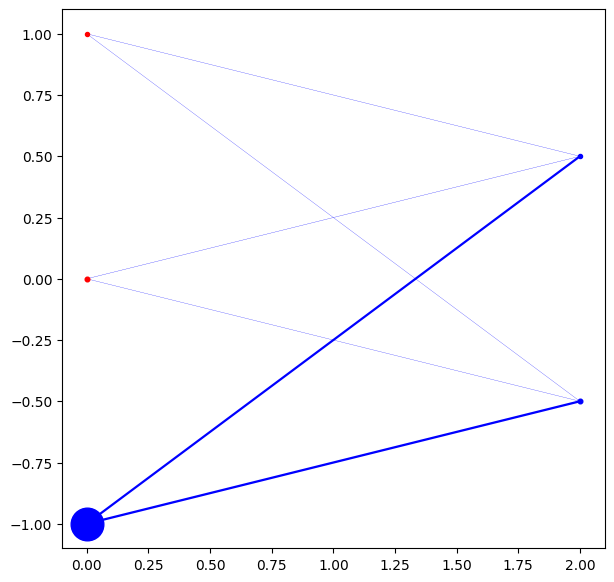

In [4]:
# Draw the learned network
draw_network(rbm.W, nv, nh)

In [5]:
# How did the weights behave during learning?
reconstruction_errors, da_list, db_list, dw_list = r

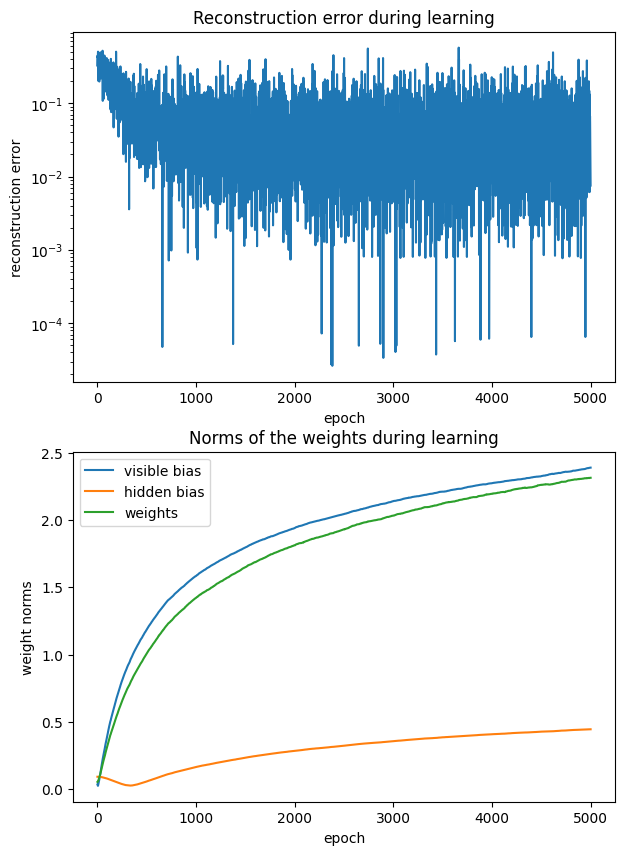

In [6]:
fig, ax = plt.subplots(2,1, figsize=(7, 10))

# Reconstruction error
ax[0].plot(range(epochs), reconstruction_errors)
ax[0].set_xlabel("epoch")
ax[0].set_ylabel("reconstruction error")
ax[0].set_yscale("log")
ax[0].set_title("Reconstruction error during learning")

# Weights
ax[1].plot(range(epochs), da_list, label="visible bias")
ax[1].plot(range(epochs), db_list, label="hidden bias")
ax[1].plot(range(epochs), dw_list, label="weights")
ax[1].set_xlabel("epoch")
ax[1].set_ylabel("weight norms")
ax[1].set_title("Norms of the weights during learning")
plt.legend()